In [72]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf
import librosa as rosa
import pyaudio

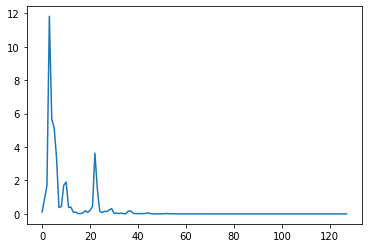

In [68]:
audio, rate = sf.read('/Users/josephcleveland/Desktop/PIANO.wav')
f, t, Zxx = signal.stft(audio, fs=rate)
Z = rosa.feature.melspectrogram(audio, sr=rate)
Z = np.mean(Z, axis=1)
plt.plot(Z)

samplerate = 256

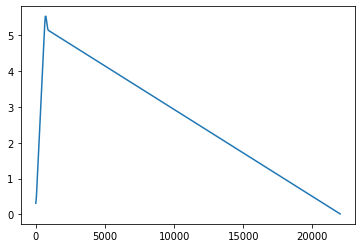

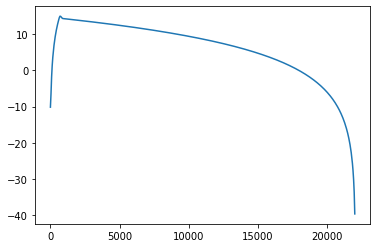

In [95]:
freqs = [0, 4, 5, 128]
gains = np.zeros(4)

for i in range(3):
    gains[i] = Z[freqs[i]]
gains[3] = 0
#gains = [0, 0, 37, 0, 0, 5, 0, 0, 1, 0, 0, 1, 0, 0]
gains = gains
taps = signal.firwin2(1000, freqs, gains, fs=samplerate)
w, h = signal.freqz(taps, 1, fs=44100, plot=lambda w, h: plt.plot(w, np.abs(h)))
plt.show()

plt.plot(w, 20 * np.log10(abs(h)))
plt.show()

b = taps
a = [1]

In [96]:
LENGTH = 2000
OUTSIZE = LENGTH * 1000
buffer = np.random.normal(0, 1, LENGTH)
outs = np.zeros(OUTSIZE)

/Users/josephcleveland/Summer/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


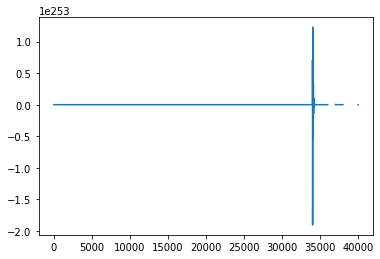

In [97]:
zi = signal.lfilter_zi(b, a)
for out in range(0, OUTSIZE, LENGTH):
    outs[out:out+LENGTH] = buffer
    buffer, zi = signal.lfilter(b, a, buffer, zi=zi*buffer[0])
    
plt.plot(outs)

In [98]:
outs = outs * 10000

In [99]:
p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=44100,
                output=True)

for s in range(0, OUTSIZE, LENGTH):
    stream.write(outs[s:s+LENGTH].astype('int16'))
stream.stop_stream()
stream.close()

p.terminate()

KeyboardInterrupt: 